In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D

DATA_PATH = '/home/fraga/Documentos/Tabular Data/February 2021/Data/train.csv'

In [2]:
df = pd.read_csv(DATA_PATH)

print(df.shape)
df.isnull().sum()

(300000, 26)


id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [3]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [4]:
encode = OrdinalEncoder()

In [5]:
y_train = df['target']
del df['target']
del df['id']

In [6]:
df.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,A,B,A,A,B,D,A,E,C,I,...,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
1,B,A,A,A,B,B,A,E,A,F,...,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
2,A,A,A,C,B,D,A,B,C,N,...,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
3,A,A,A,C,B,D,A,E,G,K,...,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
4,A,B,A,A,B,B,A,E,C,F,...,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743


In [7]:
encode.fit(df.iloc[:, 0:10])

X_train = df
X_train.iloc[:, 0:10] = encode.transform(df.iloc[:, 0:10])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train.iloc[:, 11:])
X_train.iloc[:, 11:] = scaler.transform(X_train.iloc[:, 11:])

In [9]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,4.0,2.0,8.0,...,0.114564,0.855691,0.359931,0.643496,0.882829,0.811322,0.685241,0.654854,0.913387,0.785206
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,5.0,...,0.115723,0.465907,0.288058,0.084307,0.583471,0.526128,0.570654,0.695283,0.343629,0.908989
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,1.0,2.0,13.0,...,0.129890,0.884880,0.310331,0.753604,0.852951,0.836672,0.210755,0.648330,0.904611,0.936786
3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,6.0,10.0,...,0.721352,0.902538,0.509813,0.239914,0.855406,0.802359,0.448007,0.650962,0.843251,0.638256
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,5.0,...,0.111686,0.415176,0.630849,0.140716,0.432551,0.432796,0.685273,0.635506,0.360980,0.195151


In [10]:
X_train = X_train.values
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

X_train_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)
np.random.shuffle(X_train_reshaped)

In [11]:
X_train_reshaped.shape

(300000, 24, 1)

In [12]:
model = Sequential()

model.add(Conv1D(64, kernel_size = 7, activation = 'relu', input_shape = (24, 1)))
#model.add(Dropout(0.5))
model.add(Conv1D(32, kernel_size = 3, activation = 'relu'))
model.add(Conv1D(16, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

optim = RMSprop(0.001)

model.compile(loss = 'mse', optimizer = optim)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 18, 64)            512       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 32)            6176      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 16)            1040      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 112)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                3616      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

In [13]:
history = model.fit(X_train_reshaped, y_train, epochs = 50, validation_split = 0.15)

Epoch 1/50
7969/7969 [==============================] - 27s 3ms/step - loss: 1.1840 - val_loss: 0.7879
Epoch 2/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.8030 - val_loss: 0.7860
Epoch 3/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.7984 - val_loss: 0.8110
Epoch 4/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.7993 - val_loss: 0.7859
Epoch 5/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.7959 - val_loss: 0.7907
Epoch 6/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.7964 - val_loss: 0.7899
Epoch 7/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.8000 - val_loss: 0.7862
Epoch 8/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.7987 - val_loss: 0.8083
Epoch 9/50
7969/7969 [==============================] - 26s 3ms/step - loss: 0.7959 - val_loss: 0.7860
Epoch 10/50
7969/7969 [==============================] - 26s 3ms/step - l

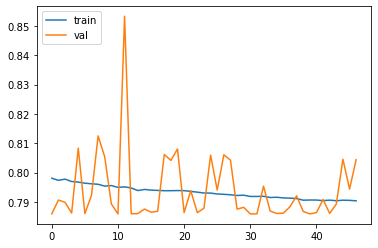

In [14]:
plt.plot(history.history['loss'][3:])
plt.plot(history.history['val_loss'][3:])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
DATA_PATH = '/home/fraga/Documentos/Tabular Data/February 2021/Data/test.csv'
df2 = pd.read_csv(DATA_PATH)

In [16]:
df2.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [17]:
ids = df2['id']
del df2['id']
ids

0              0
1              5
2             15
3             16
4             17
           ...  
199995    499987
199996    499990
199997    499991
199998    499994
199999    499995
Name: id, Length: 200000, dtype: int64

In [18]:
X_test = df2

X_test.iloc[:, 0:10] = encode.transform(df2.iloc[:, 0:10])

In [19]:
X_test.iloc[:, 11:] = scaler.transform(X_test.iloc[:, 11:])

In [20]:
X_test = X_test.values
sample_size = X_test.shape[0] # number of samples in train set
time_steps  = X_test.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

X_test_reshaped = X_test.reshape(sample_size,time_steps,input_dimension)

In [21]:
predictions = model.predict(X_test_reshaped)

In [22]:
ids.shape

(200000,)

In [23]:
predictions.shape

(200000, 1)

In [24]:
data = {
    'id': ids, 
    'target': predictions.reshape(200000)
}

In [25]:
df3 = pd.DataFrame(data)

In [26]:
df3.head()

,id,target
0,0,7.592841
1,5,7.592841
2,15,7.592841
3,16,7.592841
4,17,7.592841


In [27]:
df3.to_csv('submission5.csv', index = False)

In [28]:
X_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'